In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [30]:
!git clone https://github.com/manadda-j/BADS7604.git

fatal: destination path 'BADS7604' already exists and is not an empty directory.


In [31]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-15f05c97-beea-424d-8774-43f0054afe3d)


In [32]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.experimental.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
    print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]

NumPy 1.21.5

TensorFlow 2.8.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [33]:
np.random.seed(1234)
tf.random.set_seed(5678)

##Filter out corrupted images

In [34]:
import os

num_skipped = 0
for folder_name in ('Banana In Coconut Milk', 'Deep-Fried Rice Flour', 'Durian Sticky Rice', 'Pandanus Pudding in Coconut Cream', 
'Rice Balls in Sweet Coconut Milk', 'Sweet Sticky Rice with Thai Custard', 'Tapioca Balls with Pork Filling',
'Thai Crispy Pancake topped with Golden Threads', 'Thai Style Fried Savory Dumplings with Fish Filling', 'Toddy Palm Cake'):

    folder_path = os.path.join("/content/BADS7604/02 Image Classification/Dataset/Train Set", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [35]:
num_skipped = 0
for folder_name in ('Banana In Coconut Milk', 'Deep-Fried Rice Flour', 'Durian Sticky Rice', 'Pandanus Pudding in Coconut Cream', 
'Rice Balls in Sweet Coconut Milk', 'Sweet Sticky Rice with Thai Custard', 'Tapioca Balls with Pork Filling',
'Thai Crispy Pancake topped with Golden Threads', 'Thai Style Fried Savory Dumplings with Fish Filling', 'Toddy Palm Cake'):

    folder_path = os.path.join("/content/BADS7604/02 Image Classification/Dataset/Validate Set", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [36]:
num_skipped = 0
for folder_name in ('Banana In Coconut Milk', 'Deep-Fried Rice Flour', 'Durian Sticky Rice', 'Pandanus Pudding in Coconut Cream', 
'Rice Balls in Sweet Coconut Milk', 'Sweet Sticky Rice with Thai Custard', 'Tapioca Balls with Pork Filling',
'Thai Crispy Pancake topped with Golden Threads', 'Thai Style Fried Savory Dumplings with Fish Filling', 'Toddy Palm Cake'):

    folder_path = os.path.join("/content/BADS7604/02 Image Classification/Dataset/Test Set", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


##Explore Dataset

In [37]:
import os
import pandas as pd

train_set = {}
val_set = {}
test_set = {}

train_dir = '/content/BADS7604/02 Image Classification/Dataset/Train Set'
val_dir = '/content/BADS7604/02 Image Classification/Dataset/Validate Set'
test_dir = '/content/BADS7604/02 Image Classification/Dataset/Test Set'

# train
for folder in os.listdir(train_dir):
  path = os.path.join(train_dir, folder)
  num_pic = len([name for name in os.listdir(path)])
  train_set[folder] = num_pic

# validation
for folder in os.listdir(val_dir):
  path = os.path.join(val_dir, folder)
  num_pic = len([name for name in os.listdir(path)])
  val_set[folder] = num_pic

# test
for folder in os.listdir(test_dir):
  path = os.path.join(test_dir, folder)
  num_pic = len([name for name in os.listdir(path)])
  test_set[folder] = num_pic

num_val = [v for v in val_set.values()]
num_test = [v for v in test_set.values()]

df = pd.DataFrame(train_set.items(), columns=['Class', 'TrainSet'])

df['Validation Set'] = num_val
df['Test Set'] = num_test

In [38]:
df

Class  TrainSet  \
0  Thai Style Fried Savory Dumplings with Fish Fi...       130   
1                    Tapioca Balls with Pork Filling       151   
2                                    Toddy Palm Cake       125   
3                   Rice Balls in Sweet Coconut Milk       122   
4                              Deep-Fried Rice Flour       151   
5                             Banana In Coconut Milk       146   
6                                 Durian Sticky Rice       130   
7     Thai Crispy Pancake topped with Golden Threads       142   
8                Sweet Sticky Rice with Thai Custard       143   
9                  Pandanus Pudding in Coconut Cream       152   

   Validation Set  Test Set  
0              15        18  
1              15        16  
2              15        19  
3              15        17  
4              13        18  
5              18        18  
6              14        14  
7              20        20  
8              20        20  
9              20        20

In [39]:
print(df['TrainSet'].sum())
print(df['Validation Set'].sum())
print(df['Test Set'].sum())

1392
165
180


##Create a dataset

In [40]:
image_size = (224, 224)
batch_size = 32

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/BADS7604/02 Image Classification/Dataset/Train Set', 
                                                 image_size=image_size,
                                                 color_mode='rgb',
                                                 label_mode='categorical',
                                                 batch_size=batch_size,
                                                 seed=1234,
                                                 shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory('/content/BADS7604/02 Image Classification/Dataset/Validate Set', 
                                                 image_size=image_size,
                                                 color_mode='rgb',
                                                 label_mode='categorical',
                                                 batch_size=batch_size,
                                                 seed=1234,
                                                 shuffle=True)

test_ds = tf.keras.utils.image_dataset_from_directory('/content/BADS7604/02 Image Classification/Dataset/Test Set', 
                                                 image_size=image_size,
                                                 color_mode='rgb',
                                                 label_mode='categorical',
                                                 batch_size=179,
                                                 seed=1234,
                                                 shuffle=True)

Found 1391 files belonging to 10 classes.
Found 165 files belonging to 10 classes.
Found 180 files belonging to 10 classes.


In [42]:
class_names = train_ds.class_names
print(class_names)

['Banana In Coconut Milk', 'Deep-Fried Rice Flour', 'Durian Sticky Rice', 'Pandanus Pudding in Coconut Cream', 'Rice Balls in Sweet Coconut Milk', 'Sweet Sticky Rice with Thai Custard', 'Tapioca Balls with Pork Filling', 'Thai Crispy Pancake topped with Golden Threads', 'Thai Style Fried Savory Dumplings with Fish Filling', 'Toddy Palm Cake']


##Visualize the data

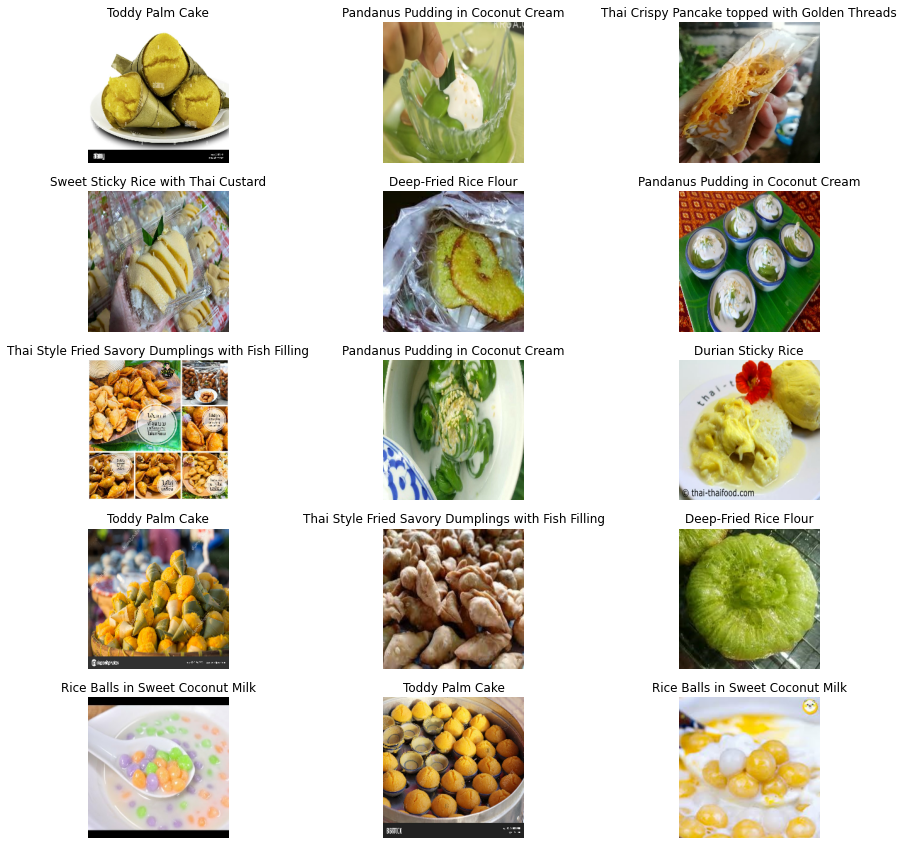

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 10)


##Data augmentation

In [45]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=1234),
                                         tf.keras.layers.RandomRotation(0.3),
                                         ])

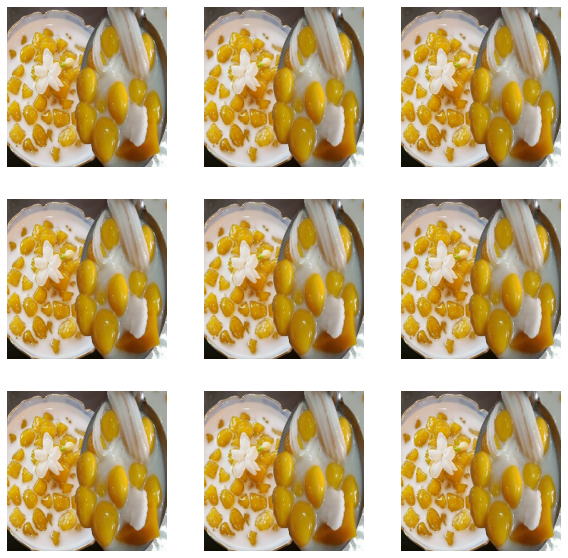

In [46]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

##Rescale pixel values

In [47]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input

##Create the base model from the pre-trained convnets

In [48]:
# Load the ImageNet EfficientNetB0 model
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(224,224,3),
                                                  include_top=False,
                                                  weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1024)


In [49]:
# freeze the layers
base_model.trainable = False

In [50]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [51]:
len(base_model.layers)

86

##Add a classification head

In [52]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1024)


In [53]:
num_classes = len(class_names)

prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


In [55]:
from tensorflow.keras.layers import Conv2D, BatchNormalization


inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)
a = BatchNormalization()(x)
#a = Conv2D(1024, (1, 1),activation = 'relu')(x)

x = global_average_layer(a)
x = tf.keras.layers.Dropout(0.2)(x)


outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                           

##Compile and Train the model

In [57]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [28]:
#%cd '/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/mn_model'

In [59]:
checkpoint_filepath = "bestmodel_epoch.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               save_weights_only=False,
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True,
                                                               )

csv_logger = tf.keras.callbacks.CSVLogger('training.log')

In [60]:
epochs=100

history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds,
                    callbacks=[model_checkpoint_callback, csv_logger],
                    )

Epoch 1/100
44/44 [==============================] - 12s 186ms/step - loss: 2.3636 - accuracy: 0.1251 - val_loss: 2.3002 - val_accuracy: 0.1818
Epoch 2/100
44/44 [==============================] - 9s 176ms/step - loss: 2.1418 - accuracy: 0.2207 - val_loss: 2.0605 - val_accuracy: 0.2485
Epoch 3/100
44/44 [==============================] - 9s 177ms/step - loss: 1.9464 - accuracy: 0.3170 - val_loss: 1.8842 - val_accuracy: 0.3333
Epoch 4/100
44/44 [==============================] - 9s 177ms/step - loss: 1.7793 - accuracy: 0.4306 - val_loss: 1.7447 - val_accuracy: 0.4485
Epoch 5/100
44/44 [==============================] - 9s 176ms/step - loss: 1.6406 - accuracy: 0.4845 - val_loss: 1.6260 - val_accuracy: 0.5030
Epoch 6/100
44/44 [==============================] - 9s 178ms/step - loss: 1.5253 - accuracy: 0.5306 - val_loss: 1.5278 - val_accuracy: 0.5333
Epoch 7/100
44/44 [==============================] - 9s 179ms/step - loss: 1.4409 - accuracy: 0.5694 - val_loss: 1.4411 - val_accuracy: 0.545

In [61]:
"""
import os
bestmodel_path = max([f for f in os.listdir('/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/mn_model') \
                      if f.startswith('bestmodel_') and f.endswith('.hdf5')])

print(bestmodel_path)
"""
mn_best = tf.keras.models.load_model('/content/bestmodel_epoch.hdf5', compile=True)

In [62]:
loss0, accuracy0 = mn_best.evaluate(val_ds)

print("initial loss: {:.4f}".format(loss0))
print("initial accuracy: {:.4f}".format(accuracy0))

6/6 [==============================] - 2s 26ms/step - loss: 0.4535 - accuracy: 0.8606
initial loss: 0.4535
initial accuracy: 0.8606


##Visualize training results

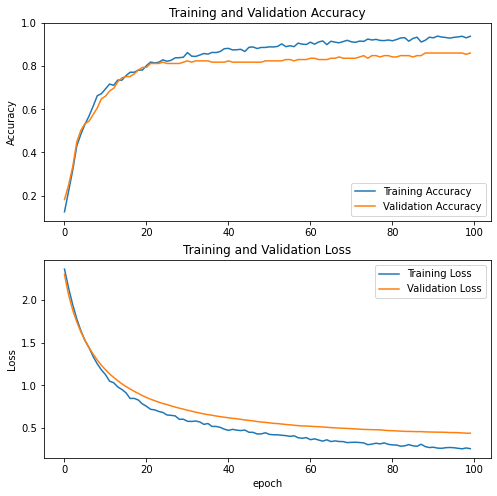

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##Evaluation and prediction

In [64]:
loss1, accuracy1 = mn_best.evaluate(test_ds)

print("initial loss: {:.4f}".format(loss1))
print("initial accuracy: {:.4f}".format(accuracy1))

2/2 [==============================] - 1s 63ms/step - loss: 0.3255 - accuracy: 0.9167
initial loss: 0.3255
initial accuracy: 0.9167


Predictions:
 [2, 2, 3, 2, 1, 0, 7, 7, 6, 5, 0, 2, 4, 9, 5, 4, 6, 2, 7, 8, 9, 9, 8, 4, 8, 4, 4, 4, 3, 4, 8, 4, 0, 2, 7, 8, 4, 3, 7, 8, 0, 9, 2, 5, 9, 5, 3, 6, 1, 7, 9, 3, 6, 4, 5, 8, 5, 6, 5, 8, 4, 4, 1, 6, 0, 3, 9, 2, 0, 7, 6, 3, 7, 1, 7, 7, 8, 6, 7, 1, 5, 4, 3, 7, 0, 1, 1, 1, 3, 9, 1, 0, 0, 9, 7, 5, 1, 8, 8, 1, 5, 7, 3, 5, 9, 8, 3, 2, 5, 7, 7, 5, 5, 2, 2, 0, 0, 0, 6, 5, 4, 9, 9, 8, 1, 0, 5, 2, 4, 5, 1, 3, 1, 5, 0, 8, 5, 6, 5, 3, 6, 2, 3, 7, 8, 4, 1, 1, 6, 6, 9, 8, 9, 1, 0, 4, 3, 5, 5, 0, 7, 9, 3, 0, 7, 3, 8, 2, 8, 5, 6, 5, 0, 8, 3, 7, 6, 8, 6]
Labels:
 [2, 2, 3, 0, 1, 0, 7, 7, 6, 5, 0, 2, 4, 9, 9, 4, 6, 1, 7, 8, 9, 9, 8, 4, 8, 4, 4, 4, 3, 4, 8, 4, 0, 2, 7, 8, 4, 3, 7, 8, 2, 9, 2, 5, 9, 1, 3, 6, 1, 7, 9, 3, 6, 4, 0, 8, 5, 6, 5, 8, 4, 4, 1, 6, 0, 3, 9, 2, 0, 7, 6, 3, 7, 1, 7, 7, 8, 6, 7, 1, 5, 4, 3, 7, 0, 1, 1, 1, 3, 9, 1, 3, 0, 9, 7, 5, 1, 8, 8, 1, 5, 7, 3, 5, 9, 8, 3, 2, 5, 7, 7, 3, 5, 2, 2, 0, 0, 0, 6, 5, 4, 9, 9, 8, 9, 0, 5, 2, 6, 5, 1, 3, 1, 5, 0, 8, 5, 6, 5, 3, 6, 2, 3, 7, 2, 4, 

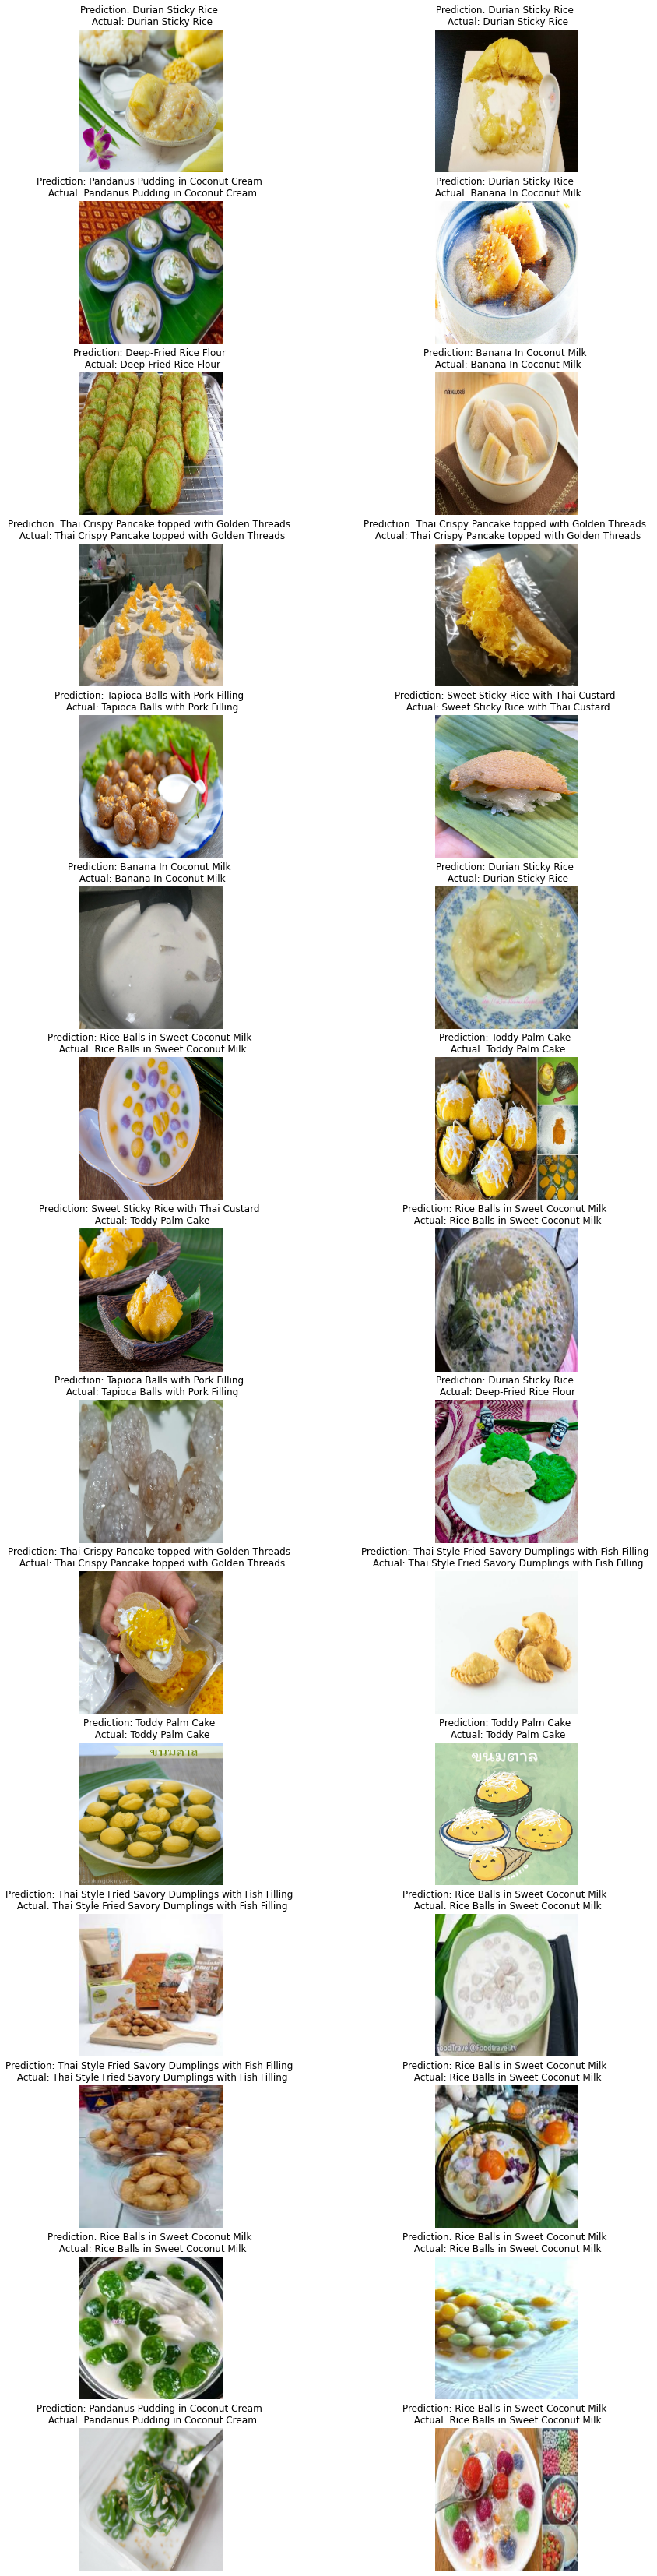

In [65]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = mn_best.predict_on_batch(image_batch)


predictions = [np.argmax(i) for i in predictions]
labels = [np.argmax(i) for i in label_batch]

print('Predictions:\n', predictions)
print('Labels:\n', labels)

plt.figure(figsize=(15, 60))
for i in range(30):
  ax = plt.subplot(15, 2, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(f"Prediction: {class_names[predictions[i]]} \n Actual: {class_names[labels[i]]}")
  plt.axis("off")

In [66]:
from sklearn.metrics import classification_report

print(classification_report(labels, predictions, target_names=class_names, digits=4))

                                                     precision    recall  f1-score   support

                             Banana In Coconut Milk     0.8889    0.8889    0.8889        18
                              Deep-Fried Rice Flour     0.8824    0.8333    0.8571        18
                                 Durian Sticky Rice     0.7857    0.7857    0.7857        14
                  Pandanus Pudding in Coconut Cream     1.0000    0.9000    0.9474        20
                   Rice Balls in Sweet Coconut Milk     0.9412    1.0000    0.9697        16
                Sweet Sticky Rice with Thai Custard     0.8333    1.0000    0.9091        20
                    Tapioca Balls with Pork Filling     0.9375    0.9375    0.9375        16
     Thai Crispy Pancake topped with Golden Threads     1.0000    1.0000    1.0000        20
Thai Style Fried Savory Dumplings with Fish Filling     0.9000    1.0000    0.9474        18
                                    Toddy Palm Cake     1.0000    0.7

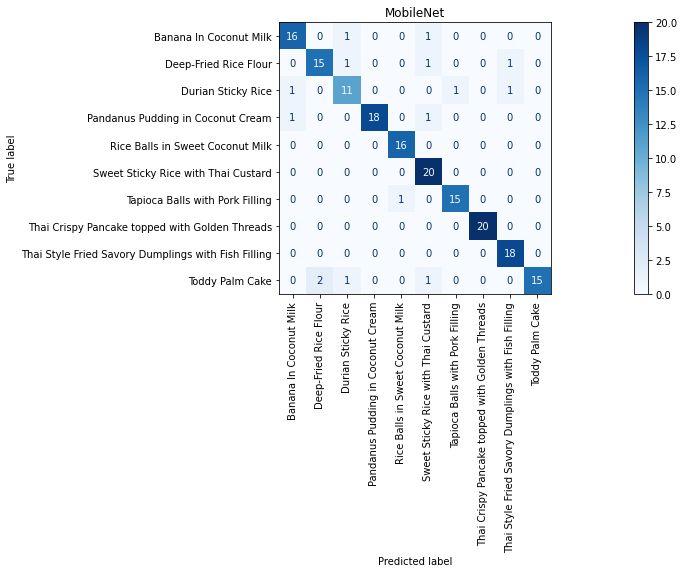

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm  = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(30,5))
disp.plot(cmap=plt.cm.Blues, ax=ax)
# plt.savefig('confusion_matrix.png')
plt.title('MobileNet')
plt.xticks(rotation=90)
plt.show()

In [68]:
mn_best.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                           

In [69]:
mn_best.layers[-1].activation

<function keras.activations.softmax>

In [70]:
mn_best.layers

In [74]:
def alter_model_for_GradCAM(model, last_conv_layer_name):
  last_conv_output = model.get_layer(last_conv_layer_name).output

  old_weights = [x.numpy() for x in model.layers[-1].weights]
  new_config = model.layers[-1].get_config()
  new_config['activation'] = tf.keras.activations.linear
  new_config['name'] = 'predictions_linear'
  out_linear = tf.keras.layers.Dense(**new_config)(model.layers[-2].output)
  out_softmax = tf.keras.activations.softmax(out_linear)

  new_model = tf.keras.Model(inputs=model.inputs, outputs=[out_softmax, out_linear, last_conv_output])
  new_model.layers[-2].set_weights(old_weights)

  return new_model

new_model = alter_model_for_GradCAM(mn_best, 'batch_normalization_1')
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                           

In [75]:
def my_imagenet_decode_predictions(preds, top=5):
  
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [ (i,) + (CLASS_INDEX[i],) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[-1], reverse = True)
    results.append(result)

    return CLASS_INDEX, results


In [76]:
def my_CNN_GradCAM(model, in_img, class_index):
  in_img = tf.cast(in_img, tf.float32)

  with tf.GradientTape() as tape:
    y_softmax, y_linear, last_conv_activation = model(in_img)
    one_class_score = y_linear[..., class_index]
  gradient = tape.gradient(one_class_score, last_conv_activation)

  gradient = gradient.numpy().squeeze(axis=0)
  alpha = np.mean(gradient,axis=(0,1))

  last_conv_activation = last_conv_activation.numpy().squeeze(axis=0)
  heatmap = np.dot(last_conv_activation, alpha)

  heatmap = np.maximum(0, heatmap)

  return heatmap

In [77]:
rootdir = '/content/BADS7604/02 Image Classification/Dataset/Test Set'

for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        print(d)

/content/BADS7604/02 Image Classification/Dataset/Test Set/Thai Style Fried Savory Dumplings with Fish Filling
/content/BADS7604/02 Image Classification/Dataset/Test Set/Tapioca Balls with Pork Filling
/content/BADS7604/02 Image Classification/Dataset/Test Set/Toddy Palm Cake
/content/BADS7604/02 Image Classification/Dataset/Test Set/Rice Balls in Sweet Coconut Milk
/content/BADS7604/02 Image Classification/Dataset/Test Set/Deep-Fried Rice Flour
/content/BADS7604/02 Image Classification/Dataset/Test Set/Banana In Coconut Milk
/content/BADS7604/02 Image Classification/Dataset/Test Set/Durian Sticky Rice
/content/BADS7604/02 Image Classification/Dataset/Test Set/Thai Crispy Pancake topped with Golden Threads
/content/BADS7604/02 Image Classification/Dataset/Test Set/Sweet Sticky Rice with Thai Custard
/content/BADS7604/02 Image Classification/Dataset/Test Set/Pandanus Pudding in Coconut Cream


In [78]:
import random
  
path ="/content/BADS7604/02 Image Classification/Dataset/Test Set/"
testset_path = []

for root, dirs, files in os.walk(path):
	for file in files:
		testset_path.append(str(os.path.join(root,file)))
  
random_path = random.sample(testset_path, 20)

In [82]:
len(random_path)

20

In [79]:
import cv2

CLASS_INDEX =  {0: 'Banana In Coconut Milk',
 1: 'Deep-Fried Rice Flour',
 2:'Durian Sticky Rice',
 3:'Pandanus Pudding in Coconut Cream',
 4:'Rice Balls in Sweet Coconut Milk',
 5:'Sweet Sticky Rice with Thai Custard',
 6:'Tapioca Balls with Pork Filling',
 7:'Thai Crispy Pancake topped with Golden Threads',
 8:'Thai Style Fried Savory Dumplings with Fish Filling',
 9:'Toddy Palm Cake'}

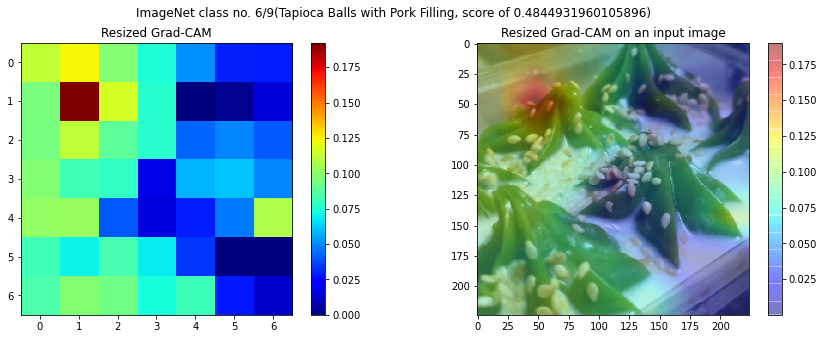

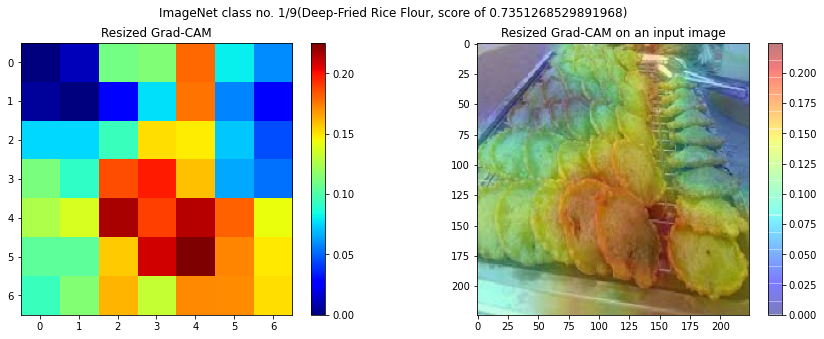

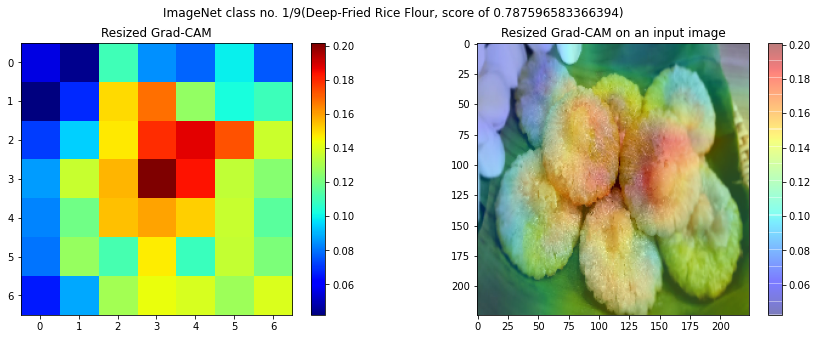

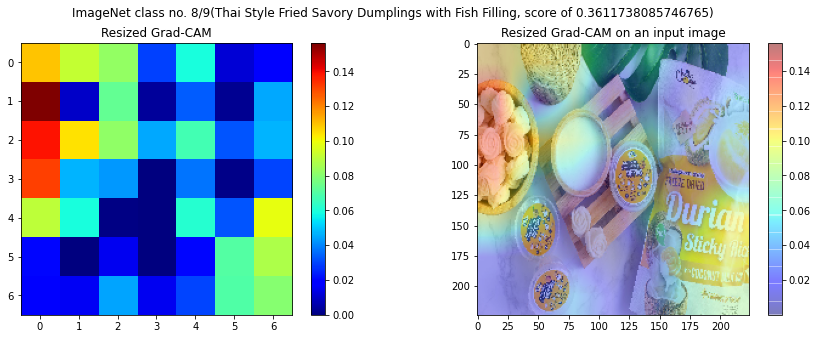

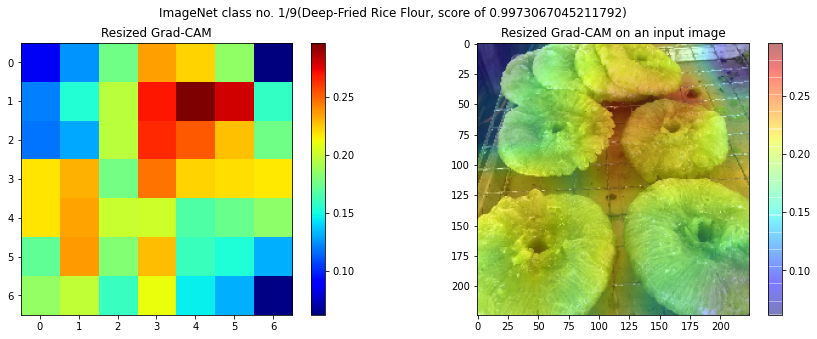

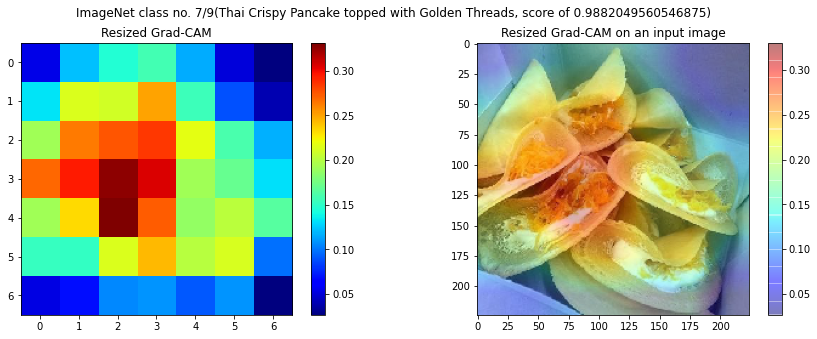

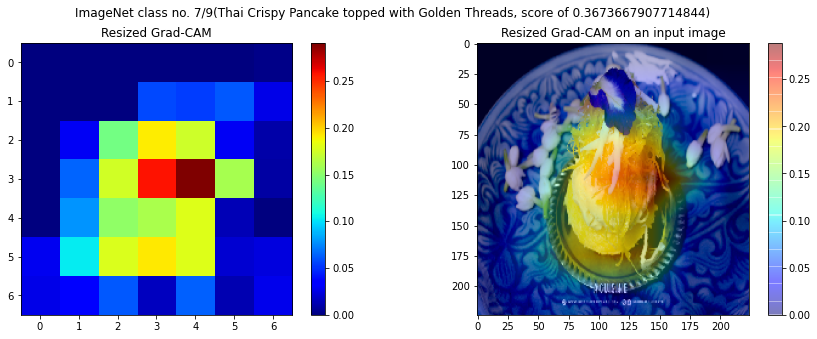

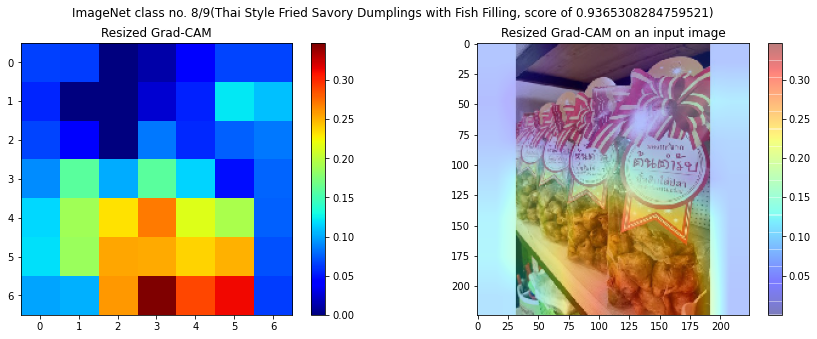

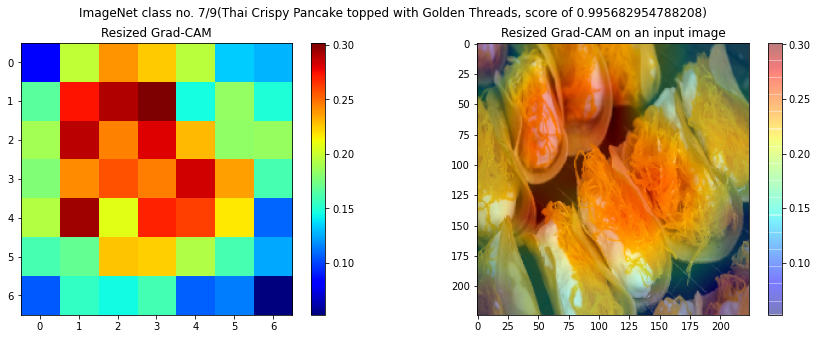

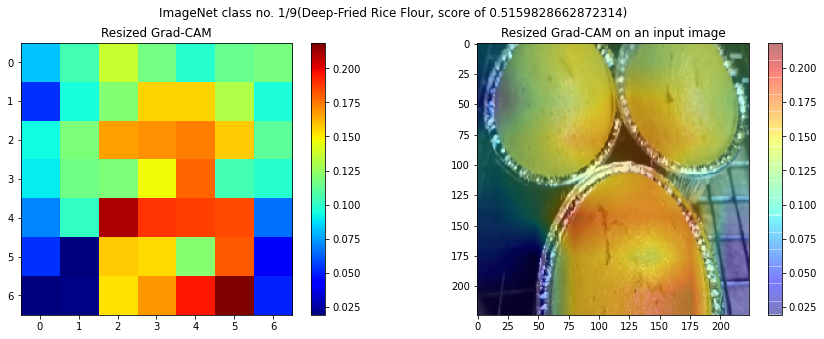

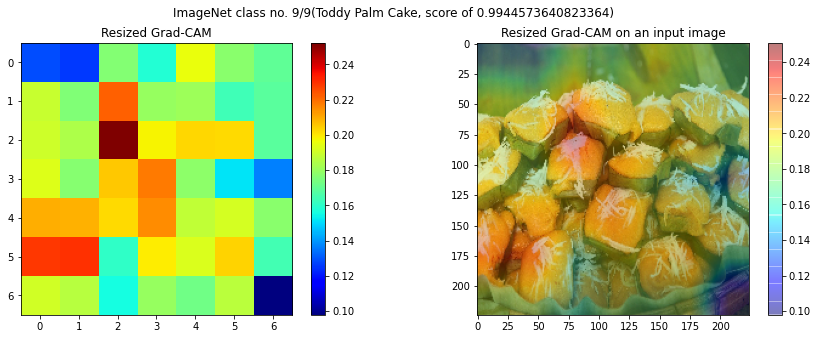

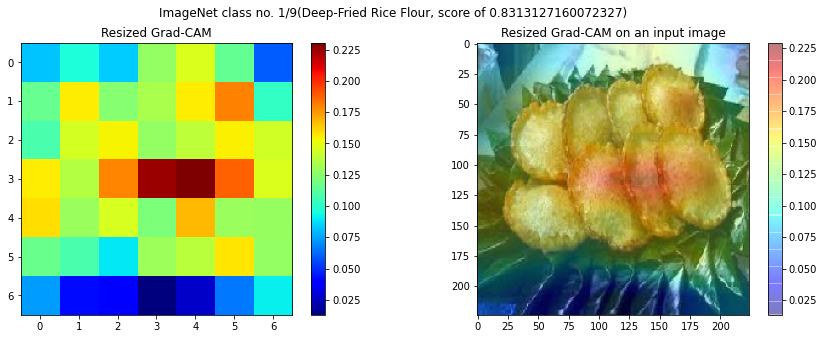

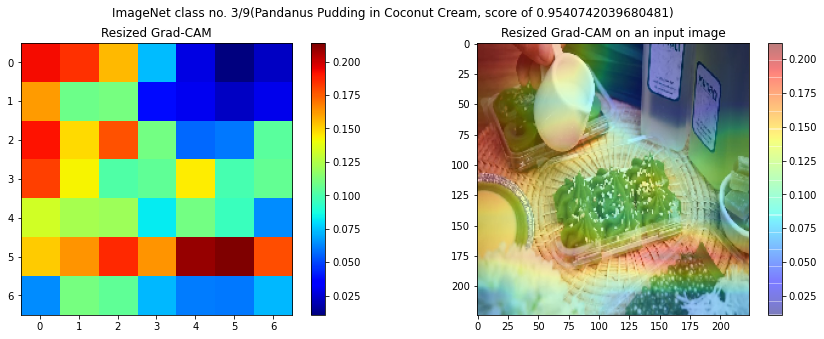

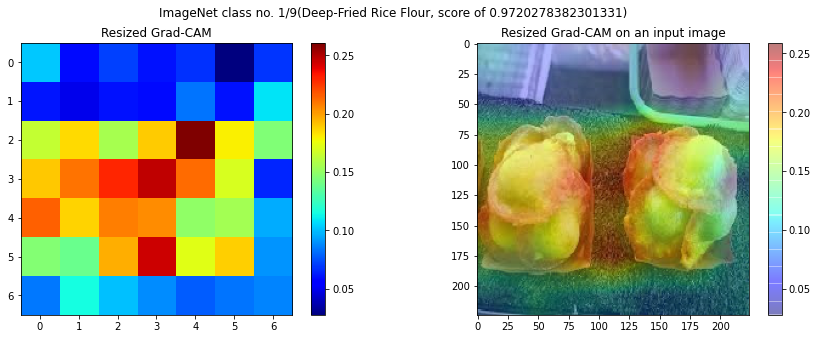

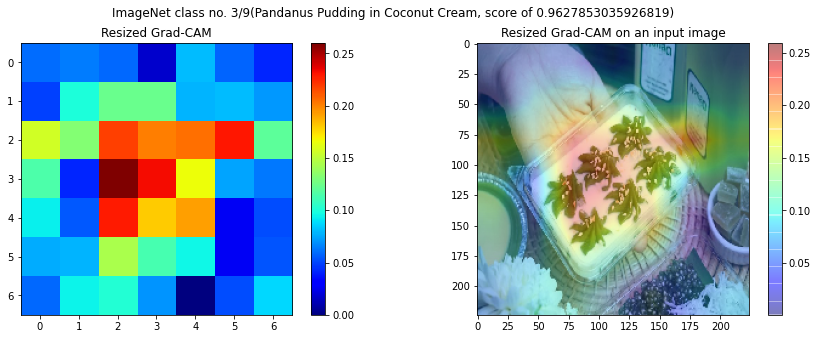

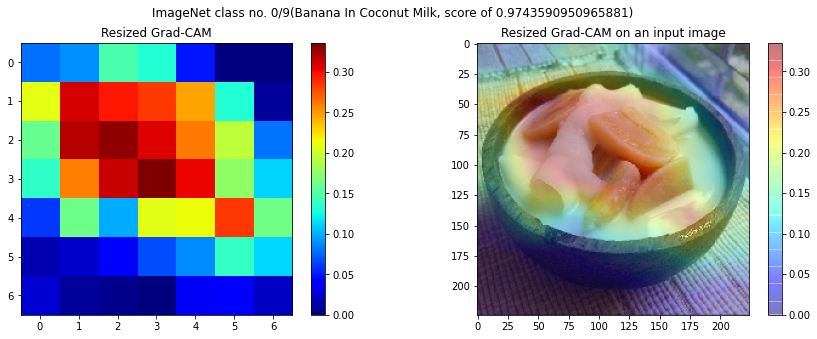

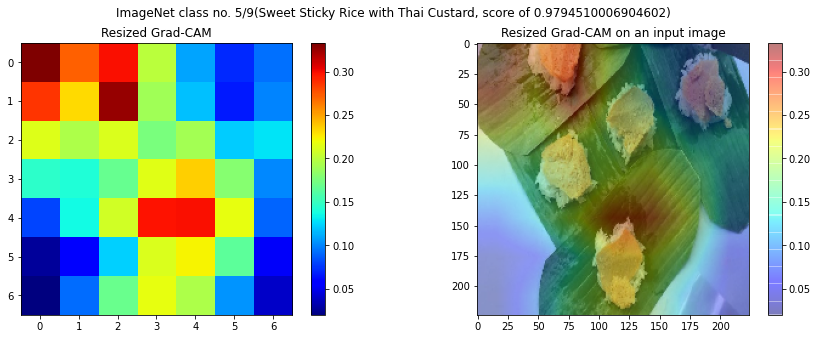

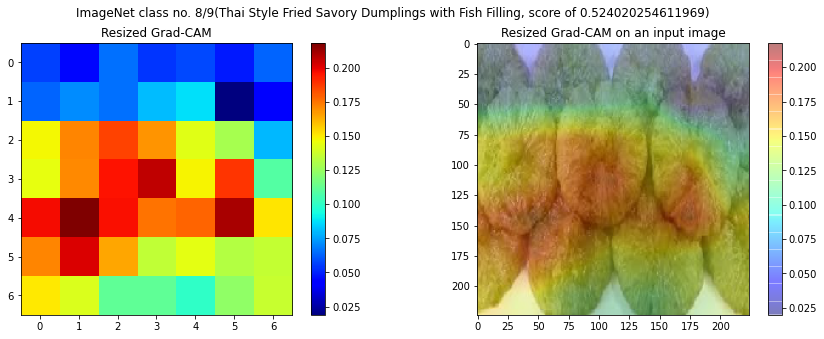

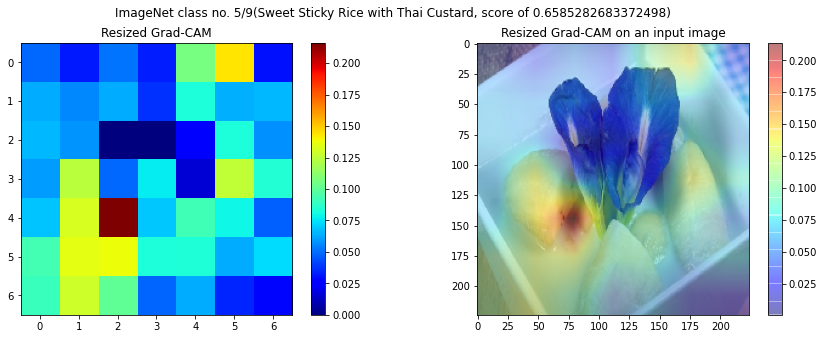

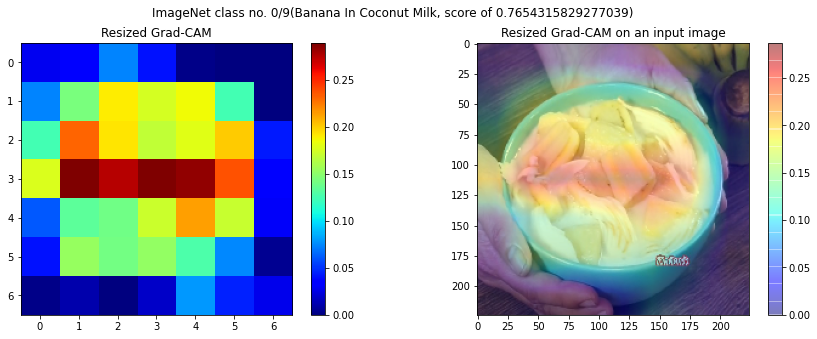

In [81]:

for path in random_path:
  img_path = path


  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  img = input_arr.astype(np.uint8)
  input_arr = np.array([input_arr])
  out_softmax, out_linear,_ =new_model.predict(input_arr)

  T_dict, result = my_imagenet_decode_predictions(out_softmax, top=10)


  _, top_results = my_imagenet_decode_predictions(out_softmax, top=1)

  top_index= top_results[0]

  class_desc = f"{T_dict[top_index[0][0]]}, score of {out_softmax[...,top_index[0][0]].squeeze()}"
  heatmap = my_CNN_GradCAM(new_model,input_arr,top_index[0][0])

  fig = plt.figure(figsize=(15,5))
  class_desc = f"{T_dict[top_index[0][0]]}, score of {out_softmax[...,top_index[0][0]].squeeze()}"
  fig.suptitle(f"ImageNet class no. {top_index[0][0]}/{len(T_dict)-1}({class_desc})")

  ax = fig.add_subplot(1,2,1)
  ax.set_title("Resized Grad-CAM")  
  im = ax.imshow(heatmap, cmap='jet')
  plt.colorbar(im, ax=ax)

  ax = fig.add_subplot(1,2,2)
  ax.set_title("Resized Grad-CAM on an input image")
  ax.imshow(img)
  alpha = 0.3
  im = ax.imshow(cv2.resize(heatmap, img.shape[:2]), cmap='jet',alpha=alpha)
  plt.colorbar(im, ax=ax)

  plt.show()
